<br>
<br>

# `#1: Video Collection Code:`


<br>
<br>

In [40]:

import cv2 as cv

# ---------------------------- Collecting the user Video ------------------------
fourcc = cv.VideoWriter_fourcc(*"XVID")
writer = cv.VideoWriter("test_video/data_collect.mp4", fourcc, 15.0, (780, 480))
cap = cv.VideoCapture(0)
cnt = 0

while cap.isOpened():
    ret, frame = cap.read()
    frame = cv.flip(frame,1)
    cnt+=1
    if not ret:
        break
    
    # Resize frame if needed to match the VideoWriter's frameSize
    frame = cv.resize(frame, (780, 480))
    writer.write(frame)

    if cnt>0 and cnt<70:
        cv.putText(frame,"Look Forward",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
    
    if cnt>70 and cnt<100:
        cv.putText(frame,"Open Your Mouth",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
    if cnt>100 and cnt<130:
        cv.putText(frame,"Blink Your Eyes",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
    if cnt>130 and cnt<160:
        cv.putText(frame,"Look Left",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
    if cnt>160 and cnt<190:
        cv.putText(frame,"Look right",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
        
    if cnt>190 and cnt<220:
        cv.putText(frame,"Look Down",(50,250),fontFace=cv.FONT_HERSHEY_SIMPLEX,
                   fontScale=1,color=(0,255,0),
                   thickness=5)
    

    cv.imshow("COLLECT_DATA", frame)

    # Break loop on 'q' key press
    if cv.waitKey(1) & 0xFF == ord('q') or cnt==220:
        break

# Release resources
cap.release()
writer.release()
cv.destroyAllWindows()



<br>
<br>

# `#2: With MTCNN Collect Face Image:`

<br>
<br>

In [31]:
print("Video Collection Complete!")

Video Collection Complete!


In [41]:
from mtcnn import MTCNN
import time 
import uuid
import cv2 as cv
import threading
# ------------------- collect image from the video ------------------------
# Initialize MTCNN detector
detector = MTCNN()

# Directory to save the images
DIR_NAME = "train_data/durjoy"


# Path to the video file
#path = "test_video\VID_20251122_132316.mp4"
path = "test_video\data_collect.mp4"

# Open the video file
cap = cv.VideoCapture(path)

# Function to perform face detection and draw rectangles
def detect_and_draw(frame):
    output = detector.detect_faces(frame)
    if len(output)==0:
        return None  
    x, y, width, height = output[0]['box']
    cv.rectangle(img=frame, pt1=(x, y), pt2=(x + width, y + height), color=(255, 0, 0), thickness=5)
    modified_frame = frame[y:y+height, x:x+width]
    return frame, modified_frame

# Initialize variables for timing
last_processed_time = time.time()
processing_interval = 1  # Process every second

# Lock for thread-safe operations
lock = threading.Lock()
detected_frame = None  # Variable to hold the frame with detected faces
processing_frame = None
modified_frame = None  # Frame currently being processed by the thread

# Thread function for detection
def detection_thread():
    global processing_frame, detected_frame,modified_frame
    while cap.isOpened():
        if processing_frame is not None:
            with lock:
                # Run face detection and update the detected_frame
                result = detect_and_draw(processing_frame)
                print(result)
                if result is None:
                    continue
                detected_frame,modified_frame = result
                processing_frame = None  # Reset processing frame once done

# Start the detection thread
thread = threading.Thread(target=detection_thread, daemon=True)
thread.start()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Get the current time
    current_time = time.time()
    
    # Check if 1 second has passed and no frame is currently being processed
    if current_time - last_processed_time >= processing_interval and processing_frame is None:
        last_processed_time = current_time
        with lock:
            processing_frame = frame.copy() 

    # If face detection was done, use the detected frame, otherwise use the original frame
    with lock:
        if detected_frame is not None:
            modified_frame, display_frame = modified_frame, detected_frame
        else:
            display_frame = frame

    # BGR to RGB, flip and show display
    display_frame = cv.cvtColor(display_frame, cv.COLOR_BGR2RGB)
    display_frame = cv.flip(display_frame, 1)

    # Save the modified frame
    if modified_frame is not None:
        unique_output_frame_name = "{}/{}.jpg".format(DIR_NAME, uuid.uuid1())
        cv.imwrite(unique_output_frame_name, modified_frame)

    # Show the output
    cv.imshow('output', display_frame)
    
    if cv.waitKey(1) == ord('q'):
        break

# Release the capture and close windows
cap.release()
cv.destroyAllWindows()


<>:16: SyntaxWarning: invalid escape sequence '\d'
<>:16: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sadman\AppData\Local\Temp\ipykernel_2952\3967869340.py:16: SyntaxWarning: invalid escape sequence '\d'
  path = "test_video\data_collect.mp4"
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


(array([[[130, 130,  80],
        [130, 130,  80],
        [130, 130,  80],
        ...,
        [130, 118,  86],
        [131, 119,  87],
        [130, 118,  86]],

       [[131, 131,  81],
        [131, 131,  81],
        [131, 131,  81],
        ...,
        [128, 116,  84],
        [129, 117,  85],
        [128, 116,  84]],

       [[133, 133,  83],
        [133, 133,  83],
        [133, 133,  83],
        ...,
        [127, 115,  83],
        [127, 115,  83],
        [125, 113,  81]],

       ...,

       [[223, 236, 197],
        [224, 237, 198],
        [230, 243, 204],
        ...,
        [ 33,  37,  25],
        [ 39,  43,  31],
        [ 45,  49,  37]],

       [[223, 236, 197],
        [223, 236, 197],
        [231, 244, 205],
        ...,
        [ 33,  37,  25],
        [ 38,  42,  30],
        [ 43,  47,  35]],

       [[222, 235, 196],
        [223, 236, 197],
        [230, 243, 204],
        ...,
        [ 32,  36,  24],
        [ 36,  40,  28],
        [ 38,  42,  30]


# `#03: Test the mtcnn`


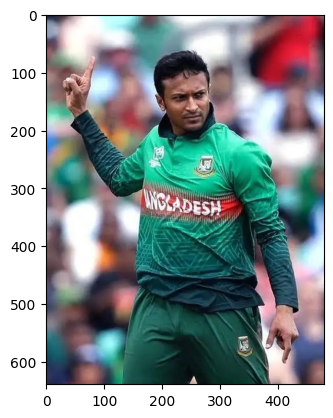

In [3]:

import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images.webp')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img)


In [5]:

from mtcnn import MTCNN
detector = MTCNN()
print("done")


Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.
Exception ignored in: <_io.BufferedReader>
Traceback (most recent call last):
  File "d:\durjoy\venv\Lib\site-packages\lz4\frame\__init__.py", line 753, in flush
    self._fp.flush()
ValueError: I/O operation on closed file.


done


In [6]:

output = detector.detect_faces(img)
print(len(output))
output[0]


1


{'box': [205, 107, 76, 95],
 'confidence': np.float64(0.9999998807907104),
 'keypoints': {'nose': [np.int64(254), np.int64(163)],
  'mouth_right': [np.int64(267), np.int64(175)],
  'right_eye': [np.int64(264), np.int64(139)],
  'left_eye': [np.int64(230), np.int64(144)],
  'mouth_left': [np.int64(237), np.int64(179)]}}